In [3]:
# import dependecies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# add the lat and lngs from practice into a list
coordinates = list(lat_lngs)

In [6]:
# import citipy module
from citipy import citipy

In [7]:
# create a list for holding the cities
cities = []

# identify nearest city for each lat and lng 
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if city is unique then add to cities list
    if city not in cities:
        cities.append(city)

# print the city count to confirm count
len(cities)

622

In [8]:
# import dependecies pt2
import requests
from config import weather_api_key
from datetime import datetime

# build basic url with api key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | santa cruz de la palma
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | kahului
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | abu samrah
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | vijes
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | saleaula
City not found. Skipping...
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | vestmannaeyjar
Processing Record 13 of Set 1 | manzhouli
Processing Record 14 of Set 1 | mercedes
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | nong bua
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | mount gambier
Processing Record 21 of Set 1 | airai
Processi

Processing Record 35 of Set 4 | dolbeau
City not found. Skipping...
Processing Record 36 of Set 4 | plettenberg bay
Processing Record 37 of Set 4 | tuatapere
Processing Record 38 of Set 4 | aljezur
Processing Record 39 of Set 4 | vardo
Processing Record 40 of Set 4 | seoul
Processing Record 41 of Set 4 | tabou
Processing Record 42 of Set 4 | dingle
Processing Record 43 of Set 4 | tartus
Processing Record 44 of Set 4 | saint-pierre
Processing Record 45 of Set 4 | syamzha
Processing Record 46 of Set 4 | omsukchan
Processing Record 47 of Set 4 | lisakovsk
Processing Record 48 of Set 4 | vilyuysk
Processing Record 49 of Set 4 | baijiantan
Processing Record 50 of Set 4 | iqaluit
Processing Record 1 of Set 5 | kamenskoye
City not found. Skipping...
Processing Record 2 of Set 5 | te anau
Processing Record 3 of Set 5 | baiyin
Processing Record 4 of Set 5 | babanusah
City not found. Skipping...
Processing Record 5 of Set 5 | bathsheba
Processing Record 6 of Set 5 | sept-iles
Processing Record 7

Processing Record 21 of Set 8 | puerto escondido
Processing Record 22 of Set 8 | college
Processing Record 23 of Set 8 | bereda
Processing Record 24 of Set 8 | cayenne
Processing Record 25 of Set 8 | urengoy
Processing Record 26 of Set 8 | batticaloa
Processing Record 27 of Set 8 | booue
Processing Record 28 of Set 8 | skagen
Processing Record 29 of Set 8 | spring valley
Processing Record 30 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 31 of Set 8 | boende
Processing Record 32 of Set 8 | dom pedro
Processing Record 33 of Set 8 | dombarovskiy
Processing Record 34 of Set 8 | ojinaga
Processing Record 35 of Set 8 | rio gallegos
Processing Record 36 of Set 8 | adrar
Processing Record 37 of Set 8 | khonuu
City not found. Skipping...
Processing Record 38 of Set 8 | thunder bay
Processing Record 39 of Set 8 | poopo
Processing Record 40 of Set 8 | nome
Processing Record 41 of Set 8 | alakurtti
Processing Record 42 of Set 8 | gurskoye
City not found. Skipping...
Processing

Processing Record 7 of Set 12 | labutta
City not found. Skipping...
Processing Record 8 of Set 12 | turinskaya sloboda
Processing Record 9 of Set 12 | poronaysk
Processing Record 10 of Set 12 | mozarlandia
Processing Record 11 of Set 12 | varnavino
Processing Record 12 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 13 of Set 12 | okhotsk
Processing Record 14 of Set 12 | ixtapa
Processing Record 15 of Set 12 | waddan
Processing Record 16 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 17 of Set 12 | gao
Processing Record 18 of Set 12 | inhambane
Processing Record 19 of Set 12 | limerick
Processing Record 20 of Set 12 | aransas pass
Processing Record 21 of Set 12 | kaura namoda
Processing Record 22 of Set 12 | inderborskiy
City not found. Skipping...
Processing Record 23 of Set 12 | puerto maldonado
Processing Record 24 of Set 12 | kachikau
City not found. Skipping...
Processing Record 25 of Set 12 | marshalltown
Processing Record 26 of Set 

In [10]:
# convert the array of dictionaries/data into a pd df
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Santa Cruz De La Palma,28.6835,-17.7642,64.40,68,75,12.66,ES,2021-03-16 23:39:23
1,Hobart,-42.8794,147.3294,64.00,67,20,8.05,AU,2021-03-16 23:38:51
2,Kahului,20.8947,-156.4700,78.80,73,40,17.27,US,2021-03-16 23:39:24
3,Hasaki,35.7333,140.8333,55.00,50,20,9.22,JP,2021-03-16 23:39:24
4,Abu Samrah,35.3029,37.1841,48.97,84,93,7.85,SY,2021-03-16 23:39:25
5,Port Alfred,-33.5906,26.8910,66.00,91,90,8.61,ZA,2021-03-16 23:39:27
6,Vijes,3.6993,-76.4423,71.60,88,40,6.91,CO,2021-03-16 23:39:27
7,Ushuaia,-54.8000,-68.3000,44.60,65,75,23.02,AR,2021-03-16 23:39:28
8,Puerto Ayora,-0.7393,-90.3518,82.40,78,20,9.22,EC,2021-03-16 23:35:24
9,Vestmannaeyjar,63.4427,-20.2734,44.94,95,100,19.75,IS,2021-03-16 23:39:28


In [11]:
# reorder columns in df 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Santa Cruz De La Palma,ES,2021-03-16 23:39:23,28.6835,-17.7642,64.40,68,75,12.66
1,Hobart,AU,2021-03-16 23:38:51,-42.8794,147.3294,64.00,67,20,8.05
2,Kahului,US,2021-03-16 23:39:24,20.8947,-156.4700,78.80,73,40,17.27
3,Hasaki,JP,2021-03-16 23:39:24,35.7333,140.8333,55.00,50,20,9.22
4,Abu Samrah,SY,2021-03-16 23:39:25,35.3029,37.1841,48.97,84,93,7.85
5,Port Alfred,ZA,2021-03-16 23:39:27,-33.5906,26.8910,66.00,91,90,8.61
6,Vijes,CO,2021-03-16 23:39:27,3.6993,-76.4423,71.60,88,40,6.91
7,Ushuaia,AR,2021-03-16 23:39:28,-54.8000,-68.3000,44.60,65,75,23.02
8,Puerto Ayora,EC,2021-03-16 23:35:24,-0.7393,-90.3518,82.40,78,20,9.22
9,Vestmannaeyjar,IS,2021-03-16 23:39:28,63.4427,-20.2734,44.94,95,100,19.75


In [12]:
# create an ouput file (csv)
output_data_file = "weather_data/cities.csv"

# export the city data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

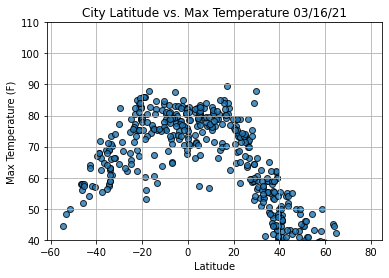

In [21]:
# import time module
import time

# build the scatter plot for lat v max temp
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylim(40, 110)
plt.grid(True)

# save the fig
plt.savefig("weather_data/Fig1.png")

# show plot
plt.show()


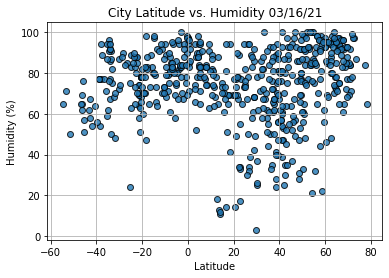

In [18]:
# build the scatter plot for lat v humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the fig
plt.savefig("weather_data/Fig2.png")

# show plot
plt.show()


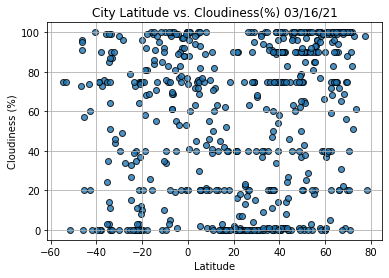

In [19]:
# build the scatter plot for lat v cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the fig
plt.savefig("weather_data/Fig3.png")

# show plot
plt.show()


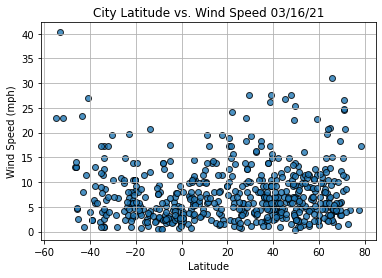

In [20]:
# build the scatter plot for lat v wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# save the fig
plt.savefig("weather_data/Fig4.png")

# show plot
plt.show()
